In [1]:
# import for CNN model
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import soundfile as sf

# import for MLPclassifier model
import librosa
import soundfile
import glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [57]:
df_combined = pd.read_csv('df_master.csv')

In [58]:
df_female = df_combined.loc[df_combined['gender']=='female']

In [73]:
df_female

,Unnamed: 0,gender,emotion,actor,0,1,2,3,4,5,...,249,250,251,252,253,254,255,256,257,258
60,60,female,neutral,2,-72.337980,-72.337980,-72.337980,-72.337980,-72.337980,-72.265970,...,-71.507057,-71.473022,-71.324112,-71.539726,-71.740387,-71.437889,-71.664574,-71.164436,-70.031761,-69.356239
61,61,female,neutral,2,-71.976210,-71.976210,-71.976210,-71.976210,-71.976210,-71.976210,...,-70.838188,-71.012337,-71.194855,-70.857216,-70.726776,-70.838249,-71.107384,-71.475655,-70.988625,-71.528450
62,62,female,neutral,2,-68.537994,-68.537994,-68.537994,-68.537994,-68.537994,-68.537994,...,-67.474571,-66.771545,-66.860603,-67.342125,-66.895645,-67.708412,-68.114517,-67.922829,-68.016182,-68.185486
63,63,female,neutral,2,-72.188500,-72.188500,-72.188500,-72.188500,-72.188500,-72.188500,...,-70.849739,-71.108902,-70.613892,-70.830200,-71.672775,-71.365112,-71.499725,-71.899986,-71.975578,-71.426781
64,64,female,calm,2,-74.553050,-74.553050,-74.344820,-74.166560,-74.167940,-74.373090,...,-73.669624,-73.665779,-73.751671,-73.119263,-72.702850,-73.019371,-72.950912,-73.385551,-73.742126,-73.961792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,female,surprise,24,-66.861420,-66.861420,-64.904045,-64.663895,-66.493380,-66.080986,...,-66.856087,-66.763268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,1436,female,surprise,24,-62.385350,-62.385350,-62.385350,-62.385350,-62.385350,-62.385350,...,-62.381603,-62.385349,-62.385349,-62.347351,-62.385349,-62.385349,-62.347870,-62.358158,-62.385349,-62.324200
1437,1437,female,surprise,24,-65.515594,-65.515594,-65.515594,-65.515594,-65.515594,-65.515340,...,-65.430077,-65.515594,-65.515594,-65.515594,-65.515594,-65.515594,-65.503250,-65.504204,-65.485886,-65.328995
1438,1438,female,surprise,24,-63.501076,-63.501076,-63.420914,-62.750460,-59.716866,-55.641666,...,-62.756214,-62.906693,-62.763382,-62.752354,-63.128231,-63.439457,-63.484074,-63.420380,-63.217319,-63.165489


In [74]:
del df_female['Unnamed: 0']

In [85]:
df_female

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
60,female,neutral,2,-72.337980,-72.337980,-72.337980,-72.337980,-72.337980,-72.265970,-71.289986,...,-71.507057,-71.473022,-71.324112,-71.539726,-71.740387,-71.437889,-71.664574,-71.164436,-70.031761,-69.356239
61,female,neutral,2,-71.976210,-71.976210,-71.976210,-71.976210,-71.976210,-71.976210,-71.976210,...,-70.838188,-71.012337,-71.194855,-70.857216,-70.726776,-70.838249,-71.107384,-71.475655,-70.988625,-71.528450
62,female,neutral,2,-68.537994,-68.537994,-68.537994,-68.537994,-68.537994,-68.537994,-68.537994,...,-67.474571,-66.771545,-66.860603,-67.342125,-66.895645,-67.708412,-68.114517,-67.922829,-68.016182,-68.185486
63,female,neutral,2,-72.188500,-72.188500,-72.188500,-72.188500,-72.188500,-72.188500,-72.188500,...,-70.849739,-71.108902,-70.613892,-70.830200,-71.672775,-71.365112,-71.499725,-71.899986,-71.975578,-71.426781
64,female,calm,2,-74.553050,-74.553050,-74.344820,-74.166560,-74.167940,-74.373090,-74.402000,...,-73.669624,-73.665779,-73.751671,-73.119263,-72.702850,-73.019371,-72.950912,-73.385551,-73.742126,-73.961792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female,surprise,24,-66.861420,-66.861420,-64.904045,-64.663895,-66.493380,-66.080986,-66.156210,...,-66.856087,-66.763268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,female,surprise,24,-62.385350,-62.385350,-62.385350,-62.385350,-62.385350,-62.385350,-62.385350,...,-62.381603,-62.385349,-62.385349,-62.347351,-62.385349,-62.385349,-62.347870,-62.358158,-62.385349,-62.324200
1437,female,surprise,24,-65.515594,-65.515594,-65.515594,-65.515594,-65.515594,-65.515340,-65.443596,...,-65.430077,-65.515594,-65.515594,-65.515594,-65.515594,-65.515594,-65.503250,-65.504204,-65.485886,-65.328995
1438,female,surprise,24,-63.501076,-63.501076,-63.420914,-62.750460,-59.716866,-55.641666,-52.376440,...,-62.756214,-62.906693,-62.763382,-62.752354,-63.128231,-63.439457,-63.484074,-63.420380,-63.217319,-63.165489


<AxesSubplot:>

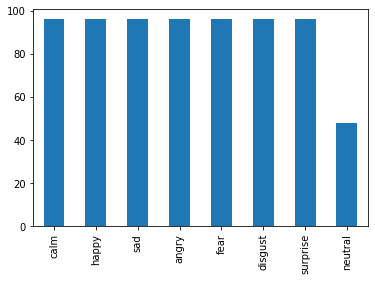

In [137]:
df_female.emotion.value_counts().plot(kind='bar')

In [86]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_female, test_size=0.2, random_state=0, stratify=df_female[['emotion','gender','actor']])

In [87]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])

In [88]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])

In [89]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [90]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [91]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


C:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [92]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(576, 259, 1)

## CNN MODEL

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [115]:
#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.05)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy',keras.metrics.Recall()])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 250, 64)           704       
                                                                 
 conv1d_37 (Conv1D)          (None, 241, 128)          82048     
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 30, 128)          0         
 g1D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 30, 128)           0         
                                                                 
 conv1d_38 (Conv1D)          (None, 21, 128)           163968    
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 2, 128)           0         
 g1D)                                                

In [116]:
# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_Recall', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=40, epochs=32, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/32
15/15 [==============================] - 4s 133ms/step - loss: 2.9425 - accuracy: 0.1285 - recall_2: 0.4583 - val_loss: 2.9124 - val_accuracy: 0.1736 - val_recall_2: 0.6458
Epoch 2/32
15/15 [==============================] - 1s 85ms/step - loss: 2.9002 - accuracy: 0.1510 - recall_2: 0.5347 - val_loss: 2.8884 - val_accuracy: 0.2569 - val_recall_2: 0.7153
Epoch 3/32
15/15 [==============================] - 1s 83ms/step - loss: 2.8720 - accuracy: 0.1892 - recall_2: 0.5816 - val_loss: 2.8648 - val_accuracy: 0.2708 - val_recall_2: 0.7639
Epoch 4/32
15/15 [==============================] - 1s 85ms/step - loss: 2.8461 - accuracy: 0.1997 - recall_2: 0.6163 - val_loss: 2.8412 - val_accuracy: 0.2708 - val_recall_2: 0.7431
Epoch 5/32
15/15 [==============================] - 1s 86ms/step - loss: 2.8029 - accuracy: 0.2274 - recall_2: 0.6840 - val_loss: 2.8119 - val_accuracy: 0.2708 - val_recall_2: 0.7500
Epoch 6/32
15/15 [==============================] - 1s 77ms/step - loss: 2.7746 - ac

In [126]:
model_history.history['recall_2']

[0.4583333432674408,
 0.5347222089767456,
 0.5815972089767456,
 0.6163194179534912,
 0.6840277910232544,
 0.7083333134651184,
 0.6996527910232544,
 0.7100694179534912,
 0.7430555820465088,
 0.765625,
 0.7621527910232544,
 0.7916666865348816,
 0.7986111044883728,
 0.8125,
 0.8020833134651184,
 0.8246527910232544,
 0.8385416865348816,
 0.8159722089767456,
 0.8420138955116272,
 0.8350694179534912,
 0.8454861044883728,
 0.8489583134651184,
 0.8333333134651184,
 0.8628472089767456,
 0.8663194179534912,
 0.8402777910232544,
 0.8645833134651184,
 0.8628472089767456,
 0.875,
 0.8715277910232544,
 0.875,
 0.8680555820465088]

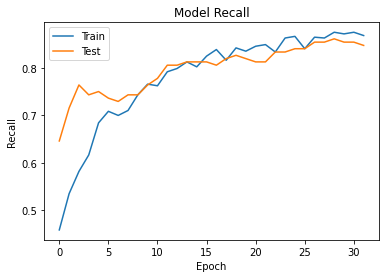

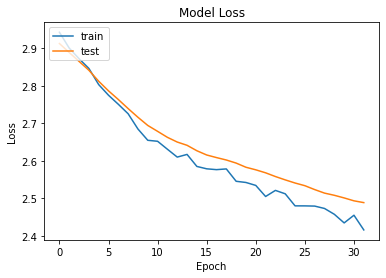

In [127]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['recall_2'])
plt.plot(model_history.history['val_recall_2'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [128]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 13ms/step - loss: 2.4883 - accuracy: 0.3542 - recall_2: 0.8472


[2.4883127212524414, 0.3541666567325592, 0.8472222089767456]

In [129]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Recall of the model is - " , model.evaluate(X_test,y_test)[2]*100 , "%")

5/5 [==============================] - 0s 14ms/step - loss: 2.4883 - accuracy: 0.3542 - recall_2: 0.8472
Loss of the model is -  2.4883127212524414
5/5 [==============================] - 0s 11ms/step - loss: 2.4883 - accuracy: 0.3542 - recall_2: 0.8472
Recall of the model is -  84.72222089767456 %


## MLPClassifier

In [130]:

X_train = X_train[:,:,0]
X_test = X_test[:,:,0]


In [131]:
# Initialize the Multi Layer Perceptron Classifier
model_mlp=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=32)
#Train the model
model_mlp.fit(X_train,y_train)

C:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=32)

In [132]:
y_pred=model_mlp.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df_max= y_pred_df.eq(y_pred_df.where(y_pred_df != 0).max(1), axis=0).astype(int)

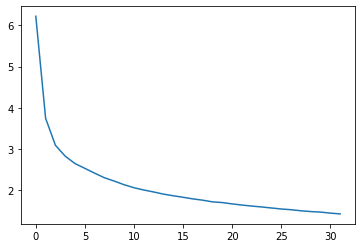

In [133]:
pd.DataFrame(y_pred_df_max)
loss_values = model_mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [134]:
min(loss_values)

1.432935028815497

In [135]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_df_max)
print("Accuracy: {:.5f}%".format(accuracy*100))



Accuracy: 28.47222%


In [136]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_df_max, average='micro')
print(recall)

0.3055555555555556
